# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Model

In [5]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
], name="SafeModel")

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train

In [7]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 5s 8ms/step - loss: 1.4060 - accuracy: 0.4987 - val_loss: 1.1403 - val_accuracy: 0.5941
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0383 - accuracy: 0.6394 - val_loss: 1.0039 - val_accuracy: 0.6504
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 0.8909 - accuracy: 0.6910 - val_loss: 0.9434 - val_accuracy: 0.6730
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 0.7910 - accuracy: 0.7245 - val_loss: 0.8592 - val_accuracy: 0.7045
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6917 - accuracy: 0.7611 - val_loss: 0.8207 - val_accuracy: 0.7179
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6058 - accuracy: 0.7916 - val_loss: 0.8255 - val_accuracy: 0.7217
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.5233 - accuracy: 0.8188 - val_loss: 0.8518 - val_accuracy: 0.7179
Epoch 

# Test

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.8897 - accuracy: 0.7395
Test accuracy: 0.7394999861717224


# Results

In [9]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.406042,0.49872,1.140324,0.5941
1,1.038270,0.63944,1.003860,0.6504
2,0.890873,0.69098,0.943379,0.6730
3,0.791021,0.72446,0.859237,0.7045
4,0.691705,0.76110,0.820749,0.7179


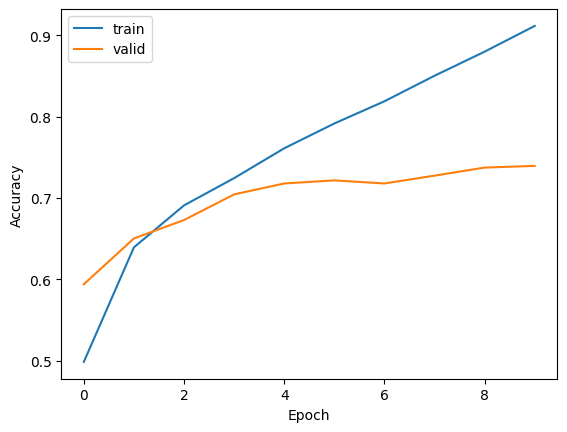

In [10]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

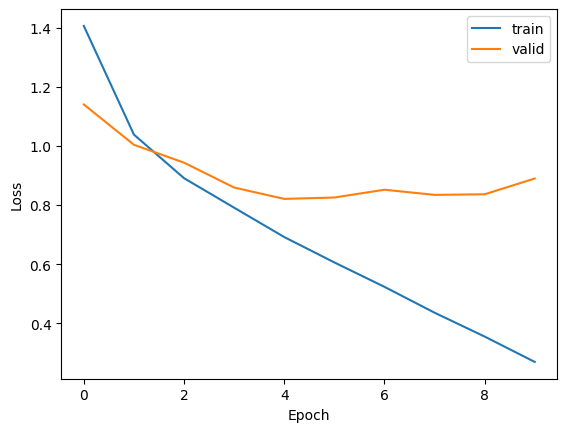

In [11]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

# Save

In [12]:
safe_model_path = "./models/safe_model.h5"
model.save(safe_model_path)

/home/alper/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
